In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
import scipy.stats
import scipy.special
import scipy.integrate
import scipy.interpolate
from scipy import constants as consts
import cepheid_variables_functions as cv
import os

# Cepheids

AN_Aur_p.dat
SY_Cas_p.dat
.DS_Store
SY_Aur_p.dat
IN_Aur_p.dat
ER_Aur_p.dat
TT_Aql_p.dat
CH_Cas_p.dat
YZ_Aur_p.dat
FM_Aql_p.dat
KK_Cas_p.dat
U_Aql_p.dat
RY_Cas_p.dat
SW_Cas_p.dat
RX_Aur_p.dat
RS_Cas_p.dat
GV_Aur_p.dat
SZ_Aql_p.dat
VW_Cas_p.dat


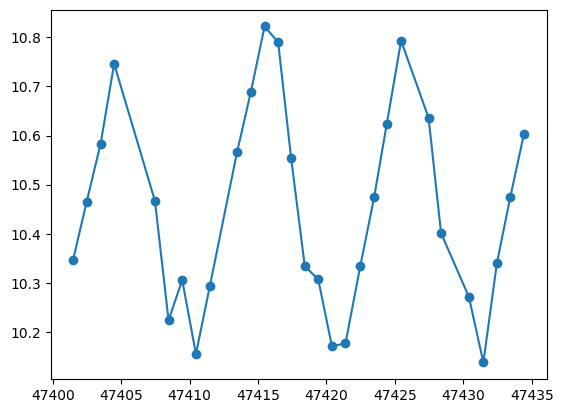

In [15]:
entries  = os.scandir('data_files/')
for entry in entries:
    print(entry.name)


AN_Aur = np.loadtxt('data_files/AN_Aur_p.dat', unpack = True, usecols = [0,1])
plt.figure()
plt.plot(AN_Aur[0],AN_Aur[1],'o-')
plt.show()


AN_Aur_time = AN_Aur[0]
AN_Aur_mag = AN_Aur[1]

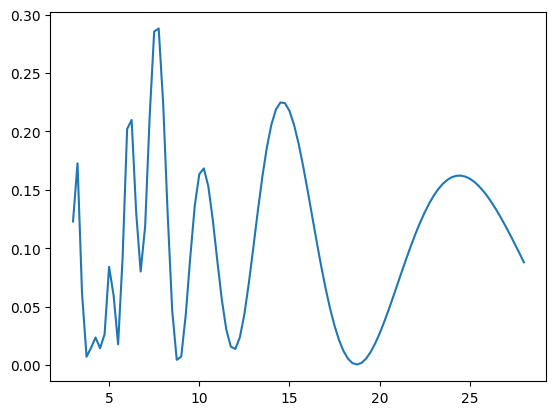

In [17]:
periods = np.linspace(3,28,101)


relative_time = AN_Aur_time - AN_Aur_time[0]

power = cv.powerSpectrum(relative_time, AN_Aur_mag, periods)
plt.figure()
plt.plot(periods, power)
plt.show()


In [19]:
from scipy.signal import find_peaks
peaks_indices, _ = find_peaks(power, distance=5)
peaks_periods = periods[peaks_indices]

In [26]:
import os
path = 'data_files/'
file_list = [f for f in sorted(os.listdir(path))
             if f.endswith('.dat')]

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    print(file, peaks_periods)
    
    """
    plt.figure()
    plt.plot(time, v_mag, 'o-')
    plt.show()
    plt.figure()
    plt.plot(periods, power)
    plt.show()
    """
    

AN_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]
CH_Cas_p.dat [ 3.5   5.    7.25 10.   15.   26.25]
ER_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.5  24.5 ]
FM_Aql_p.dat [ 3.25  4.75  7.    9.5  13.   21.5 ]
GV_Aur_p.dat [ 4.25  5.5   7.75 13.25]
IN_Aur_p.dat [ 4.25  5.5   8.   13.5 ]
KK_Cas_p.dat [ 3.5   5.25  6.75  9.5  14.   23.5 ]
RS_Cas_p.dat [ 3.5   4.75  7.25 17.  ]
RX_Aur_p.dat [ 3.5   5.    6.25  7.75 11.5  22.25]
RY_Cas_p.dat [ 3.5   6.25  7.75 10.   15.25 23.75]
SW_Cas_p.dat [ 3.5   4.75  7.25 18.25]
SY_Aur_p.dat [ 3.25  4.75  6.    8.5  14.75]
SY_Cas_p.dat [ 4.25  6.5   8.25 11.25 15.25 25.25]
SZ_Aql_p.dat [ 4.    6.    7.5   9.75 14.5  24.75]
TT_Aql_p.dat [ 3.25  4.75  7.75 10.5  15.25 26.  ]
U_Aql_p.dat [ 4.5   6.75  9.75 12.5  17.25]
VW_Cas_p.dat [ 3.5   4.75  6.5   8.25 11.   24.75]
YZ_Aur_p.dat [ 3.25  5.    6.25  7.75 10.25 14.75 24.25]


In [64]:
for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    relative_time = time - time[0]
    power = cv.powerSpectrum(relative_time, v_mag, periods)
    peaks_indices, _ = find_peaks(power, distance=5)
    peaks_periods = periods[peaks_indices]
    
    def visual_mag(t, phi, P, del_m_v):
        return v_mag[0] + del_m_v*(np.sin(2*np.pi*t/P + phi))


for i in periods:
    scipy.optimize.curve_fit(cv.powerSpectrum, time, v_mag, periods, 
                                                    p0 = peaks_periods[np.floor(i)])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [62]:

for file in file_list:
    filename = path + file
    time, v_mag = np.loadtxt(filename, unpack = True, usecols = [0,1])
    m_v0 = np.mean(v_mag)
    relative_time = time - time[0]

phi = np.pi/4
t = relative_time
del_m_v = 0.5
for i in periods:
    def visual_mag(t,P):
        return m_v0 + del_m_v*(np.sin(2*np.pi*t/P + phi))
    popt, _ = scipy.optimize.curve_fit(visual_mag, time, v_mag, p0 = [1, periods[np.floor(i)]])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [66]:
def visual_mag(t,P):
    return m_v0 + del_m_v*(np.sin(2*np.pi*t/P + phi))
popt, _ = scipy.optimize.curve_fit(visual_mag, time, v_mag, p0 = [1, peaks_periods[i]])
print(popt)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

3.25
5.0
6.25
7.75
10.25
14.75
24.25


ValueError: x and y must have same first dimension, but have shapes (27,) and (29,)

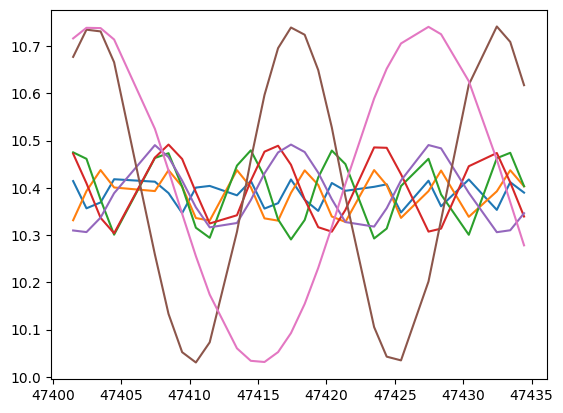

In [91]:
def func(t, m_v, phi,m_v0,P):
    return m_v0+m_v*(np.sin((2*np.pi*t/P) +phi))
plt.figure()
for i in peaks_periods:
    print(i)
    popt, _ = scipy.optimize.curve_fit(func, time, v_mag, p0 = [10.5,0.5,1,i], maxfev = 5000)
    
    plt.plot(time,func(time,popt[0],popt[1],popt[2],i))
    
    
plt.plot(time,AN_Aur[1],'o-')
plt.show